# Exercises - June 7 2019

### Day 13
### June 7 2019 
### P. Sudarshan Kumar

## Mission 1: Recap

### Instructions

        ● Read dc_airbnb_train.csv into a Dataframe and assign to train_df.
        
        ● Read dc_airbnb_test.csv into a Dataframe and assign to test_df.

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def read(filename):
    df = pd.read_csv(filename)
    return df
df = read('Data Files/dc_listings.csv')
train_df = read('Data Files/dc_airbnb_train.csv')
test_df = read('Data Files/dc_airbnb_test.csv')
train_df

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,2,1.0,1.0,1.0,119.0,2,1125,4
1,10,6.0,4.0,8.0,499.0,2,1125,8
2,1,1.0,1.0,1.0,45.0,1,1125,0
3,2,1.0,1.0,1.0,55.0,1,10,0
4,2,1.0,1.0,1.0,60.0,1,730,1
5,2,1.0,1.0,1.0,97.0,3,1125,2
6,1,1.0,1.0,1.0,104.0,1,1125,2
7,2,0.0,1.0,1.0,122.0,2,1125,5
8,4,2.0,2.0,2.0,299.0,3,365,2
9,4,0.0,1.0,2.0,120.0,1,1125,9


## Mission 2: Hyperparameter Optimization

### Instructions

        ● Change the list of hyperparameter values, hyper_params, so it ranges from 1 to 20.
        
        ● Create an empty list and assign to mse_values.
        
        ● Use a for loop to iterate over hyper_params and in each iteration:
        
            ○ Instantiate a KNeighborsRegressor object with the following parameters:

                ■ n_neighbors: the current value for the iterator variable,

                ■ algorithm: brute
        
            ○ Fit the instantiated k-nearest neighbors model to the following columns from
            train_df:
        
                ■ accommodates
                ■ bedrooms
                ■ bathrooms
                ■ number_of_reviews

            ○ Use the trained model to make predictions on the same columns from test_df
            and assign to predictions.

            ○ Use the mean_squared_error function to calculate the MSE value between
            predictions and the price column from test_df.

            ○ Append the MSE value to mse_values.

        ● Display mse_values using the print() function.

In [2]:
hyper_params = [1,2,3,4,5]
mse_values = []
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
    train_features = train_df[['accommodates','bedrooms', 'bathrooms', 'number_of_reviews']]
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[['accommodates','bedrooms', 'bathrooms', 'number_of_reviews']])
    mse_values.append(mean_squared_error(test_df['price'], predictions))
mse_values

[21276.599544937428,
 18120.746018202502,
 16792.6051068133,
 16825.25369738339,
 16773.39431171786]

## Mission 3: Expanding grid search

### Instructions

        ● Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to
        hyper_params.
        
        ● Create an empty list and assign to mse_values.
        
        ● Use a for loop to iterate over hyper_params and in each iteration:
        
            ○ Instantiate a KNeighborsRegressor object with the following parameters:

                ■ n_neighbors: the current value for the iterator variable,

                ■ algorithm: brute
        
            ○ Fit the instantiated k-nearest neighbors model to the following columns from
            train_df:
        
                ■ accommodates
                ■ bedrooms
                ■ bathrooms
                ■ number_of_reviews

            ○ Use the trained model to make predictions on the same columns from test_df
            and assign to predictions.

            ○ Use the mean_squared_error function to calculate the MSE value between
            predictions and the price column from test_df.

            ○ Append the MSE value to mse_values.

        ● Display mse_values using the print() function.

In [3]:
hyper_params = []
for i in range(1,21):
    hyper_params.append(i)
mse_values = []
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
    train_features = train_df[['accommodates','bedrooms', 'bathrooms', 'number_of_reviews']]
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[['accommodates','bedrooms', 'bathrooms', 'number_of_reviews']])
    mse_values.append(mean_squared_error(test_df['price'], predictions))
mse_values    

[21276.599544937428,
 18120.746018202502,
 16792.6051068133,
 16825.25369738339,
 16773.39431171786,
 16161.85817216534,
 16135.090896426831,
 16293.758603526734,
 16302.46288571469,
 16210.28981797497,
 16225.105755037186,
 15788.228455631399,
 15778.971154687617,
 15576.687939680989,
 15597.981767159652,
 15591.735610423777,
 15625.302864611012,
 15560.510663773366,
 15669.886246962835,
 15777.521106370874]

## Mission 4: Visualizing Hyperparameter values

### Instructions

       ● Use the scatter() method from matplotlib.pyplot to generate a line plot with:
       
            ○ hyper_params on the x-axis,

            ○ mse_values on the y-axis.

        ● Use plt.show() to display the line plot.

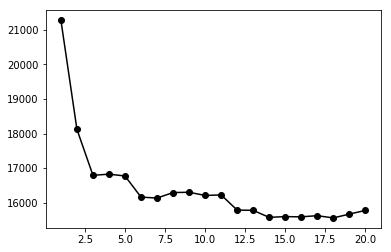

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
plt.plot(hyper_params, mse_values, '-ok')

## Mission 5: Varying features and hyperparameters

### Instructions
        ● Use a for loop to iterate over hyper_params and in each iteration:
        
            ○ Instantiate a KNeighborsRegressor object with the following parameters:

                ■ n_neighbors: the current value for the iterator variable,
                ■ algorithm: brute

            ○ Fit the instantiated k-nearest neighbors model to all of the columns, except for
            the price column, from train_df

            ○ Use the trained model to make predictions on the same columns from test_df
            and assign to predictions.

            ○ Use the mean_squared_error function to calculate the MSE value between
            predictions and the price column from test_df.

            ○ Append the MSE value to mse_values.
        
        ● Use the scatter() method from matplotlib.pyplot to generate a line plot with:
            ○ hyper_params on the x-axis,

            ○ mse_values on the y-axis.

        ● Use plt.show() to display the line plot.

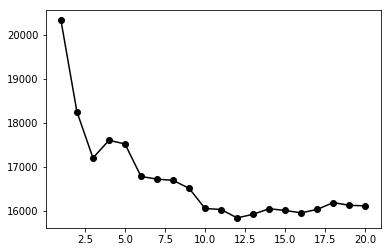

In [11]:
hyper_params = []
for i in range(1,21):
    hyper_params.append(i)
mse_values = []
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
    train_features = train_df[['accommodates','bedrooms', 'bathrooms', 'number_of_reviews','minimum_nights','maximum_nights','maximum_nights']]
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[['accommodates','bedrooms', 'bathrooms', 'number_of_reviews','minimum_nights','maximum_nights','maximum_nights']])
    mse_values.append(mean_squared_error(test_df['price'], predictions))
plt.plot(hyper_params, mse_values, '-ok')    

## Mission 6: Practice the workflow

### Instructions
    ● While using only the accommodates and bathrooms columns:
    
        ○ Train a model for each k value between 1 and 20 using the training data.

        ○ Use each model to make predictions on the test set (using just the
        accommodates and bathrooms columns).

        ○ Calculate each model's MSE value by comparing each set of predictions to the
        true price values.

        ○ Find the k value that obtained the lowest MSE value.

        ○ Create a dictionary named two_hyp_mse that contains 1 key-value pair:
    
            ■ key: k value that resulted in lowest MSE value.
            ■ value: corresponding MSE value.
    
    ● Repeat this process while using only the accommodates, bathrooms, and
    bedrooms columns:
    
        ○ Create a dictionary named three_hyp_mse that contains 1 key-value pair:
    
            ■ key: k value that resulted in lowest MSE value.
            ■ value: corresponding MSE value.
    
    ● Display both two_hyp_mse and three_hyp_mse using the print() function.

In [29]:
hyper_params = []
for i in range(1,21):
    hyper_params.append(i)
mse_values = {}
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
    train_features = train_df[['accommodates', 'bathrooms']]
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[['accommodates', 'bathrooms']])
    mse_values[i] = mean_squared_error(test_df['price'], predictions)
two_hyp_mse = min(mse_values.items(), key=lambda x: x[1])
two_hyp_mse

(5, 16172.953765642775)

In [30]:
hyper_params = []
for i in range(1,21):
    hyper_params.append(i)
mse_values = {}
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
    train_features = train_df[['accommodates','bedrooms', 'bathrooms']]
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[['accommodates','bedrooms', 'bathrooms']])
    mse_values[i] = mean_squared_error(test_df['price'], predictions)
three_hyp_mse = min(mse_values.items(), key=lambda x: x[1])
three_hyp_mse

(5, 15331.746666666668)